# Classificazione multiclasse
In questo notebook vedremo come possiamo utilizzare Keras per eseguire una classificazione multiclasse.
Il dataset sulla quale opereremo è il MNIST, un dataset contenete immagini digitali di cifre scritte a mano, da 0 a 9.<br>
Cominciamo importando i moduli che ci serviranno.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Caricamento del dataset

Il dataset MNIST va scaricato da [questo sito](http://yann.lecun.com/exdb/mnist/), devi scaricare i seguenti 4 files:

* train-images-idx3-ubyte.gz
* train-labels-idx1-ubyte.gz
* t10k-images-idx3-ubyte.gz
* t10k-labels-idx1-ubyte.gz

poi decomprimili e inseriscili all'interno di una cartella "MNIST", senza rinominarli.
<br>
<br>
I files con le features contengono immagini in formato binario, quindi ho scritto una funzione che ti permette di ottenere direttamente gli array di train e test da questi files (la puoi trovare all'interno del file mnist.py)



In [4]:
from scripts.mnist import load_mnist

X_train, X_test, y_train, y_test = load_mnist(path="MNIST")
print("Numero totale di proprietà: "+str(X_train.shape[1]))
print("Esempi di training: "+str(X_train.shape[0]))
print("Esempi di test: "+str(X_test.shape[0]))

Numero totale di proprietà: 784
Esempi di training: 60000
Esempi di test: 10000


Ogni esempio è composto da un vettore contenente i pixel dell'immagine spacchettati su di un'unica riga, utilizzando la funzione imshow di matplotlib possiamo visualizzare l'immagine.

La cifra nell'immagine è un 5


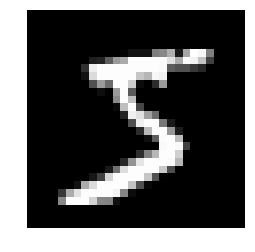

In [5]:
plt.imshow(X_train[0].reshape([28,28]), cmap="gray")
plt.axis('off') # rimuoviamo i valori sulle assi 
print("La cifra nell'immagine è un %d" % y_train[0])

## Preprocessing dei dati

L'output è espresso come un numero che va da 0 a 9, che corrisponde all'immagine mostrata. La nostra rete dovrà avere 10 nodi di output, quindi dobbiamo creare 10 output differenti utilizzando delle dummy variables.

In [6]:
from keras.utils import to_categorical

num_classes=10

y_train_dummy = to_categorical(y_train, num_classes)
y_test_dummy = to_categorical(y_test, num_classes)

y_train[0]

5

Trattandosi di immagini è opportuno eseguire la normalizzazione. L'intensità del pixel è espressa tramite un valore che va da 0 a 255, quindi per eseguire la normalizzazione possiamo semplicemente eseguire la divisione per 255.

In [7]:
print("Prima della normalizzazione")
print("Valore massimo: %d" % X_train.max())

X_train = X_train/255
X_test = X_test/255

print("Dopo la normalizzazione")
print("Valore massimo: %d" % X_train.max())

Prima della normalizzazione
Valore massimo: 255
Dopo la normalizzazione
Valore massimo: 1


## Creazione del modello
Adesso possiamo creare il nostro modello utilizzando la classe Sequential di Keras, per eseguire una classificazione multiclasse dobbiamo impostare come funzione di attivazione dello strato di output la **softmax** e come numero di nodi il numero di classi.

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(num_classes, activation='softmax'))

Utilizziamo il metodo summary per vedere quanti parametri stiamo andando ad addestrare.

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


Hai letto bene, sono 567.434 ! Ti potrebbe sembrare una cifra enorme ma è comprensibile considerando il numero di strati e nodi della nostra rete e il fatto che il numero di features del dataset siano 784 (ogni esempio è un'immagine da 28x28 pixel).
<br>
Compiliamo il modello, trattandosi di una classificazione multiclasse come funzione di costo dobbiamo impostare la categorical_crossentropy.

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Adesso possiamo far partire l'addestramento facendolo girare per 20 epoche, in base alla potenza di calcolo del tuo computer potrebbero essere necessari diversi minuti.

In [ ]:
model.fit(X_train, y_train_dummy, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.5546 - acc: 0.8558
Epoch 2/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.2380 - acc: 0.9316
Epoch 3/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.1829 - acc: 0.9472
Epoch 4/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.1498 - acc: 0.9568
Epoch 5/20
60000/60000 [==============================] - 25s 420us/step - loss: 0.1264 - acc: 0.9638
Epoch 6/20
60000/60000 [==============================] - 26s 430us/step - loss: 0.1082 - acc: 0.9686
Epoch 7/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.0940 - acc: 0.9730
Epoch 8/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.0823 - acc: 0.9768
Epoch 9/20
60000/60000 [==============================] - 22s 365us/step - loss: 0.0727 - acc: 0.9794
Epoch 10/20
60000/60000 [==============================] - 18s 305us/step - loss: 

Verifichiamo anche sul test set

In [11]:
model.evaluate(X_test, y_test_dummy)

10000/10000 [==============================] - 0s 44us/step


[0.07192426959685981, 0.9782]

I risultati sono di tutto rispetto, infatti il problema che abbiamo affrontato, con un dataset così vasto, è decisamente semlice per una rete neurale artificiale.
<br><br>
Diamo uno sguardo agli esempi del test set che il nostro modello ha sbagliato a classificare.

Numero 2 classificato come 4


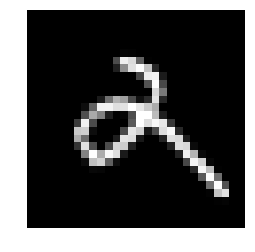

Numero 4 classificato come 2


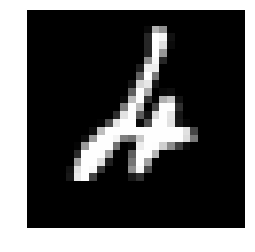

Numero 6 classificato come 0


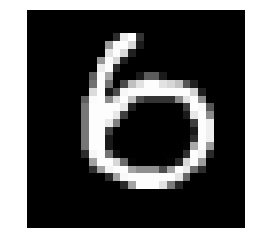

Numero 2 classificato come 7


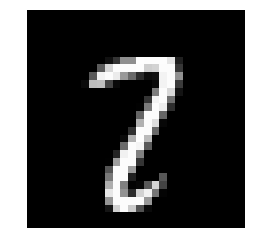

Numero 3 classificato come 7


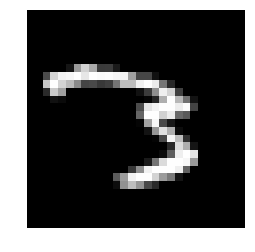

Numero 6 classificato come 0


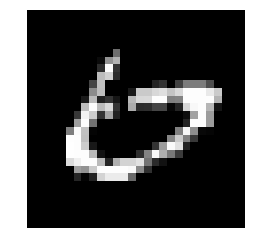

Numero 8 classificato come 2


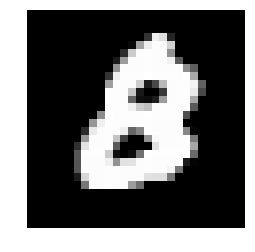

Numero 8 classificato come 2


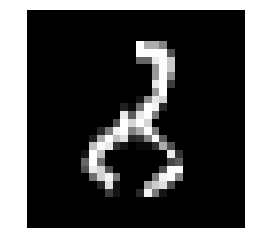

Numero 2 classificato come 6


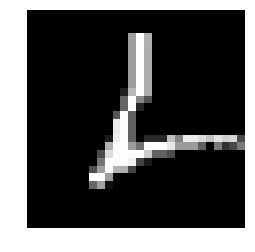

Numero 2 classificato come 1


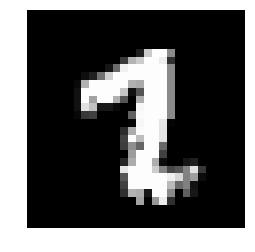

Numero 7 classificato come 3


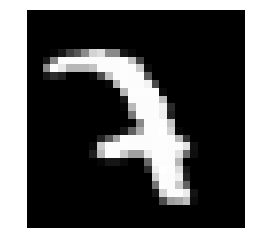

Numero 8 classificato come 4


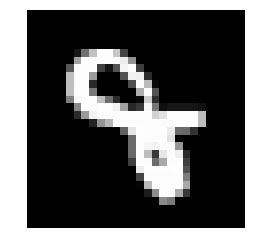

Numero 4 classificato come 9


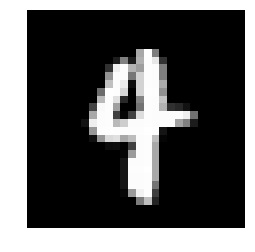

Numero 5 classificato come 8


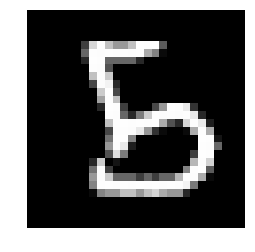

Numero 9 classificato come 7


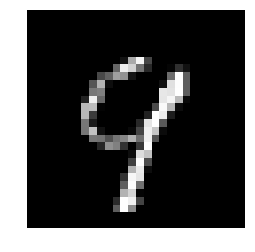

Numero 1 classificato come 3


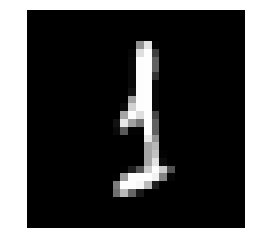

Numero 8 classificato come 9


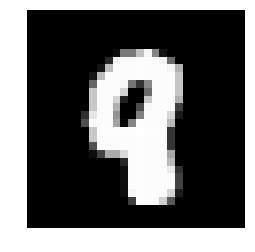

Numero 5 classificato come 4


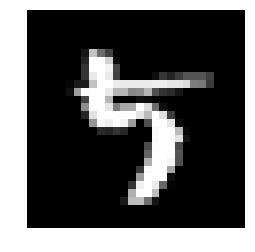

Numero 6 classificato come 0


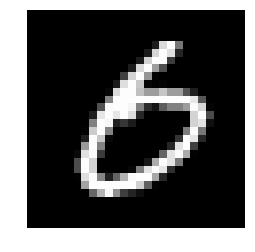

Numero 5 classificato come 3


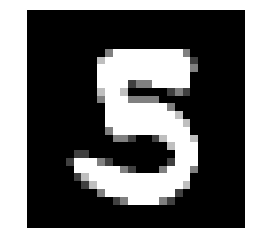

Numero 6 classificato come 5


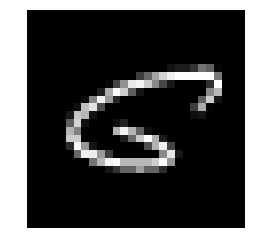

Numero 6 classificato come 8


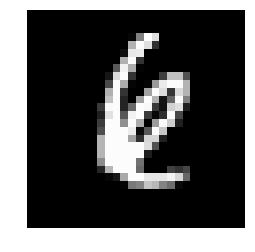

Numero 4 classificato come 6


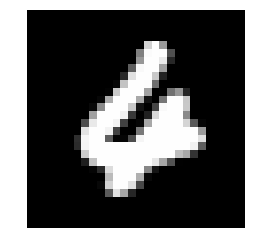

Numero 3 classificato come 7


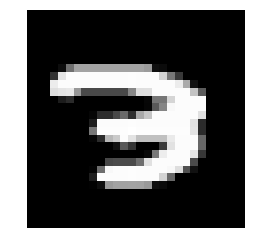

Numero 7 classificato come 8


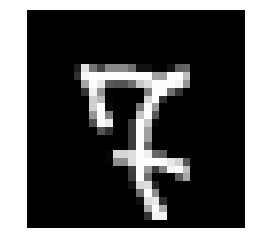

Numero 4 classificato come 0


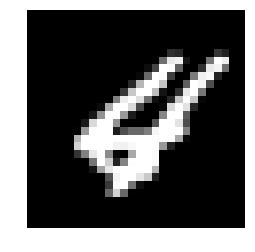

Numero 6 classificato come 1


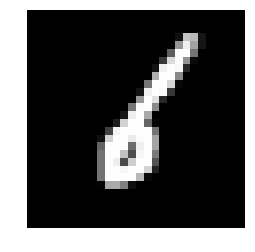

Numero 7 classificato come 9


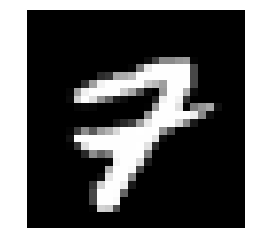

Numero 7 classificato come 2


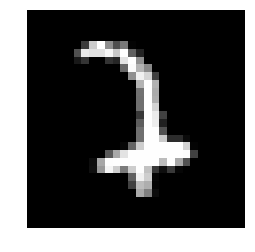

Numero 9 classificato come 4


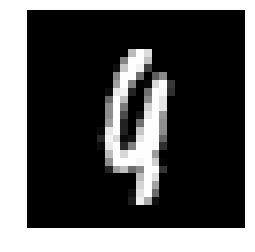

Numero 4 classificato come 9


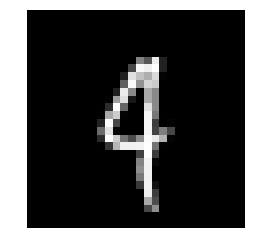

Numero 9 classificato come 5


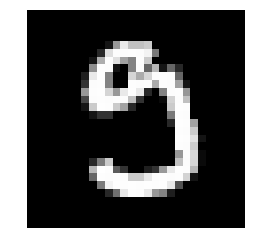

Numero 7 classificato come 1


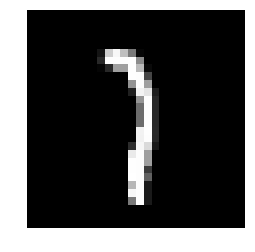

Numero 5 classificato come 7


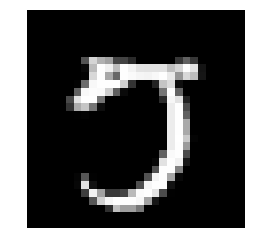

Numero 8 classificato come 3


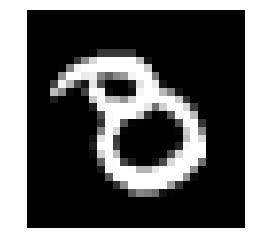

Numero 7 classificato come 9


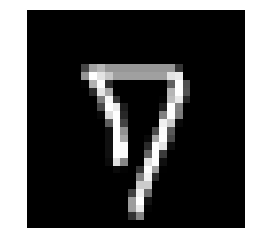

Numero 5 classificato come 6


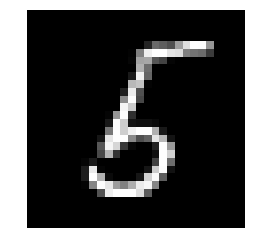

Numero 5 classificato come 3


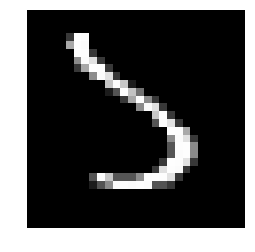

Numero 9 classificato come 7


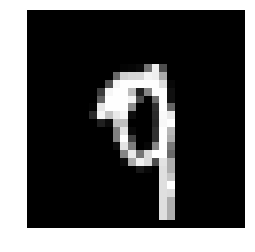

Numero 8 classificato come 3


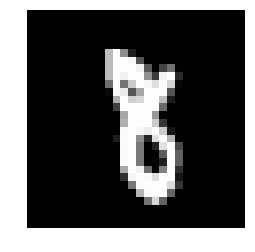

Numero 6 classificato come 4


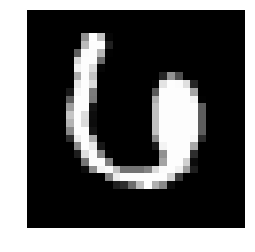

Numero 8 classificato come 3


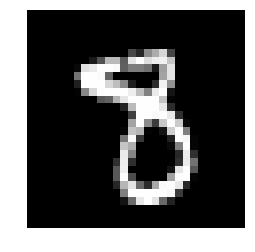

Numero 7 classificato come 0


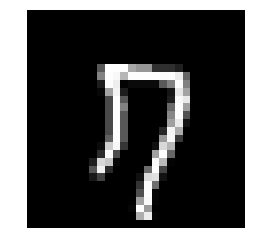

Numero 7 classificato come 1


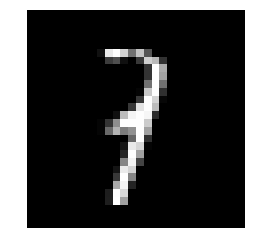

Numero 7 classificato come 9


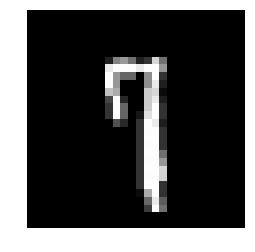

Numero 8 classificato come 7


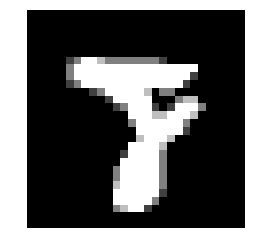

Numero 4 classificato come 6


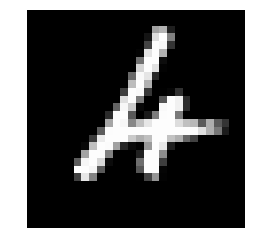

Numero 9 classificato come 3


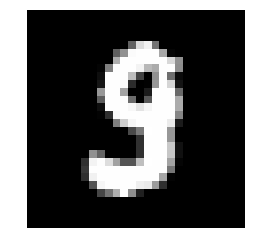

Numero 2 classificato come 3


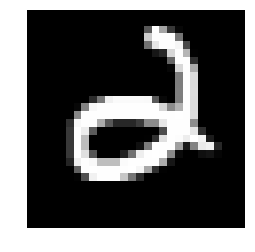

Numero 7 classificato come 3


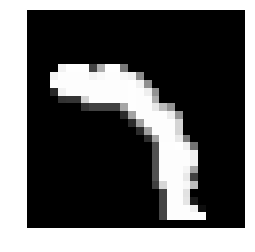

Numero 3 classificato come 7


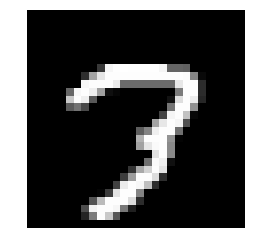

Numero 9 classificato come 3


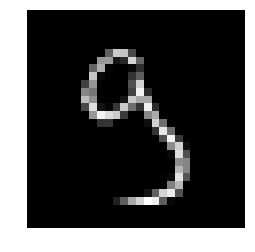

Numero 4 classificato come 2


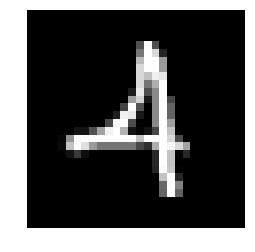

Numero 7 classificato come 2


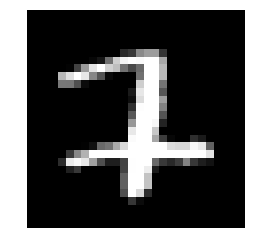

Numero 8 classificato come 5


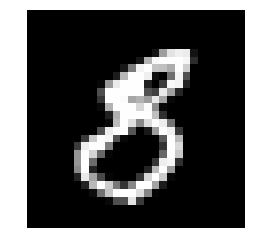

Numero 2 classificato come 7


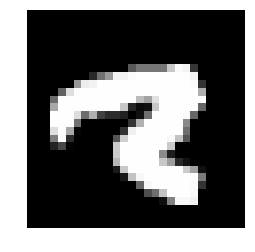

Numero 8 classificato come 3


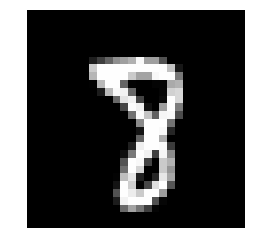

Numero 9 classificato come 4


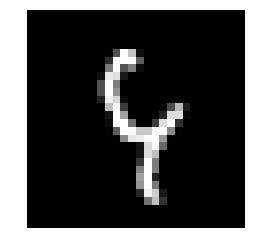

Numero 7 classificato come 2


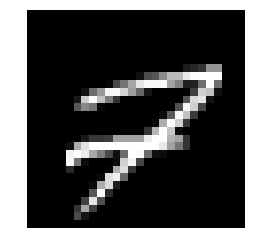

Numero 9 classificato come 3


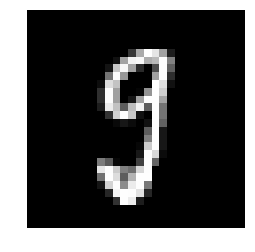

Numero 8 classificato come 3


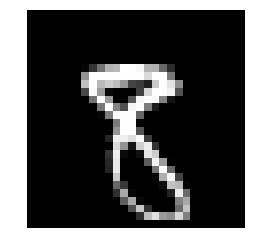

Numero 7 classificato come 2


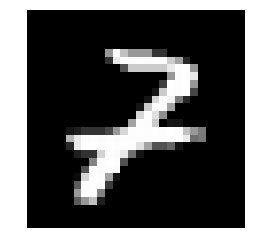

Numero 5 classificato come 3


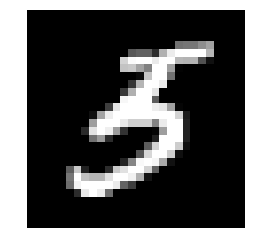

Numero 5 classificato come 4


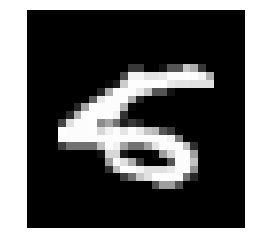

Numero 2 classificato come 7


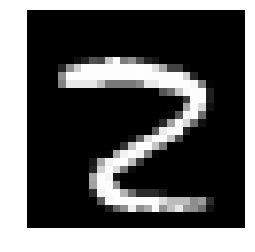

Numero 4 classificato come 9


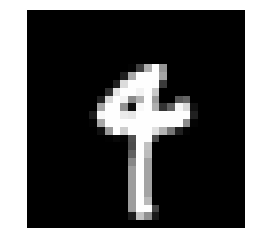

Numero 2 classificato come 0


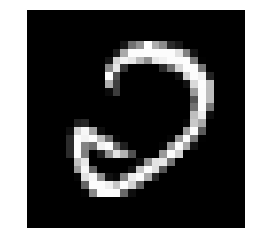

Numero 3 classificato come 7


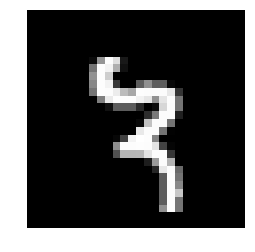

Numero 6 classificato come 4


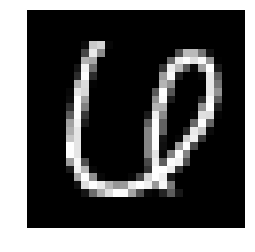

Numero 4 classificato come 9


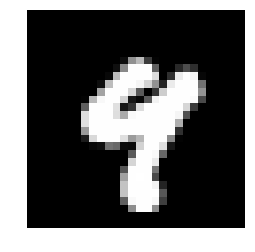

Numero 6 classificato come 1


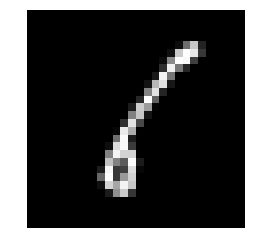

Numero 8 classificato come 0


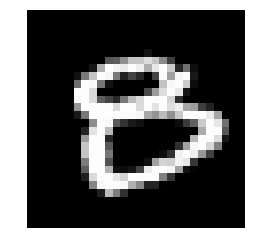

Numero 9 classificato come 6


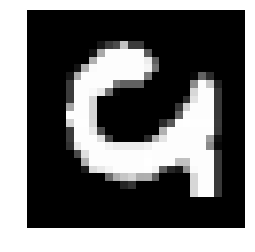

Numero 8 classificato come 0


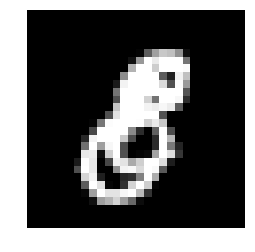

Numero 5 classificato come 9


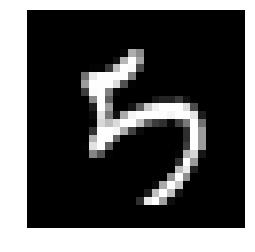

Numero 9 classificato come 1


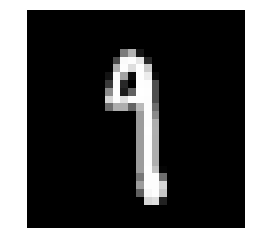

Numero 8 classificato come 3


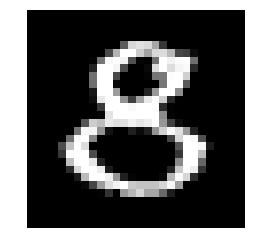

Numero 3 classificato come 2


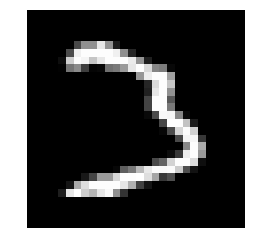

Numero 9 classificato come 4


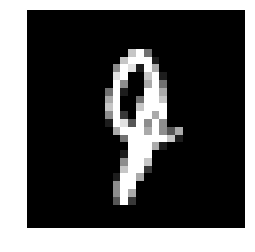

Numero 2 classificato come 4


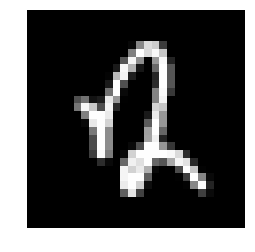

Numero 4 classificato come 9


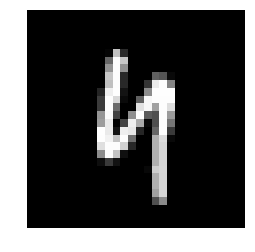

Numero 5 classificato come 3


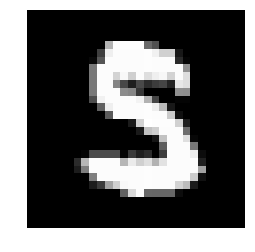

Numero 5 classificato come 3


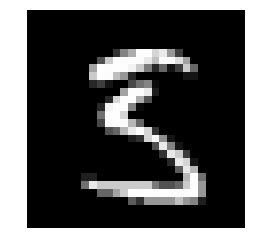

Numero 7 classificato come 1


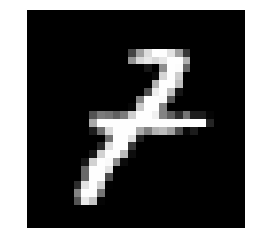

Numero 9 classificato come 0


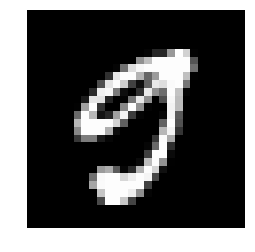

Numero 6 classificato come 1


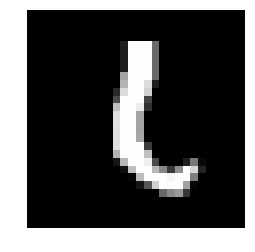

Numero 8 classificato come 3


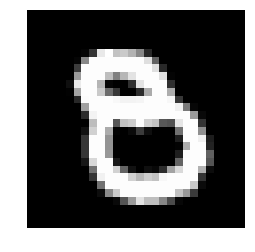

Numero 4 classificato come 7


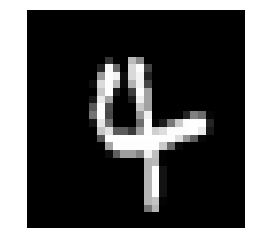

Numero 8 classificato come 0


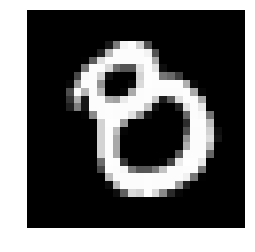

Numero 7 classificato come 3


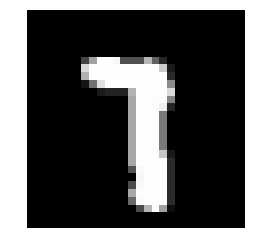

Numero 3 classificato come 2


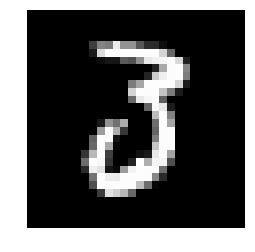

Numero 9 classificato come 7


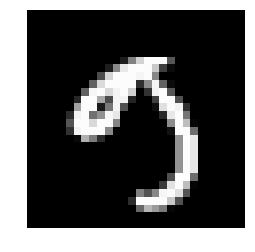

Numero 3 classificato come 5


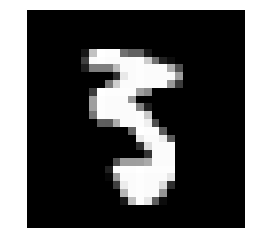

Numero 8 classificato come 3


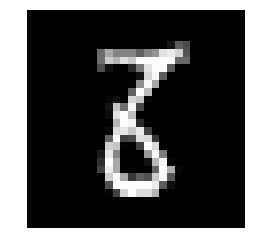

Numero 1 classificato come 2


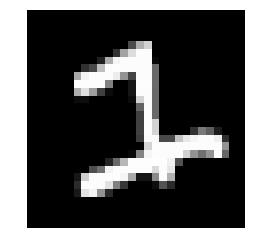

Numero 5 classificato come 9


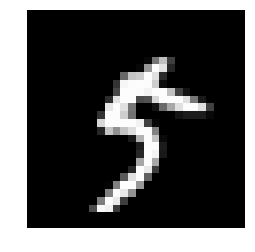

Numero 8 classificato come 3


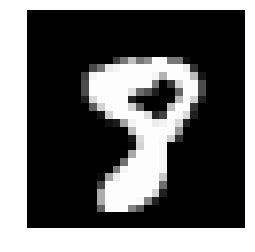

Numero 7 classificato come 9


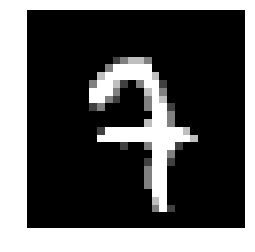

Numero 4 classificato come 9


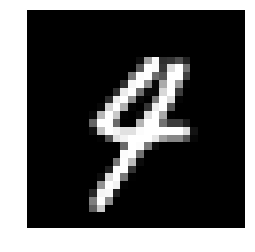

Numero 6 classificato come 0


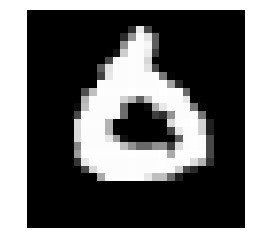

Numero 9 classificato come 1


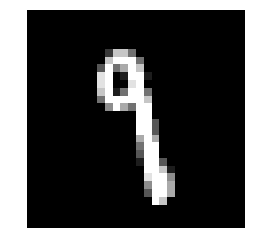

Numero 6 classificato come 4


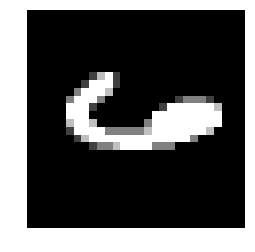

Numero 4 classificato come 9


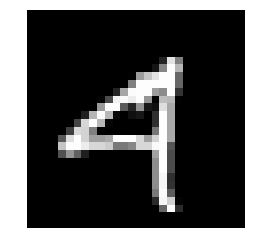

Numero 5 classificato come 0


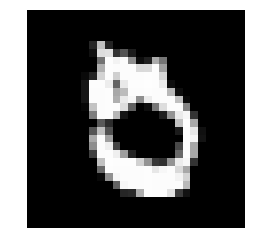

Numero 8 classificato come 5


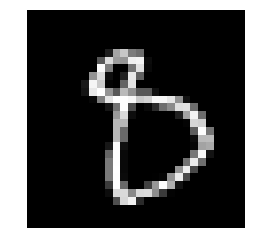

Numero 8 classificato come 5


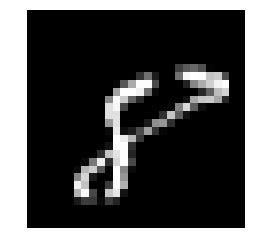

Numero 9 classificato come 3


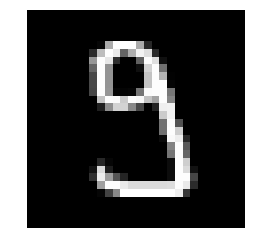

Numero 8 classificato come 3


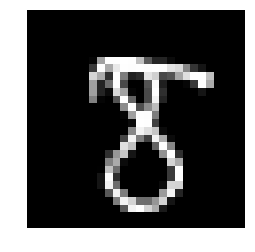

Numero 2 classificato come 3


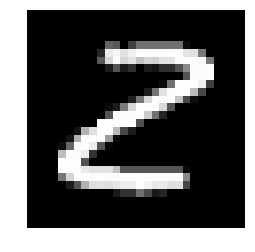

Numero 5 classificato come 3


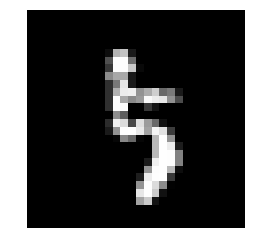

Numero 4 classificato come 9


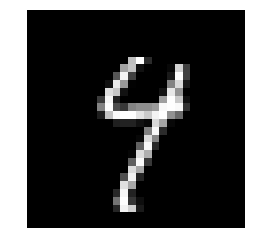

Numero 8 classificato come 3


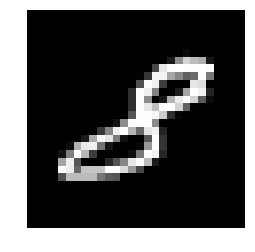

Numero 5 classificato come 8


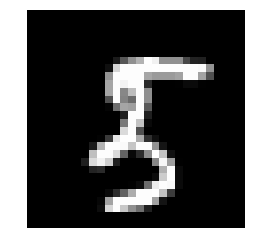

Numero 4 classificato come 2


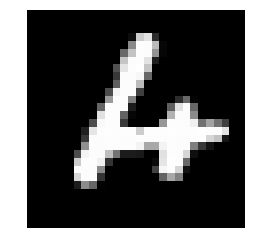

Numero 2 classificato come 8


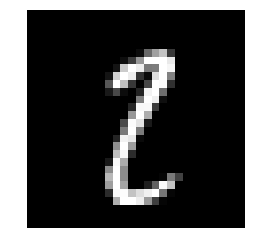

Numero 7 classificato come 8


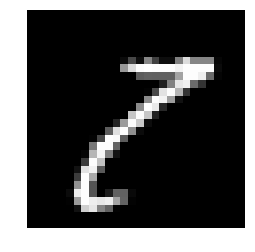

Numero 2 classificato come 3


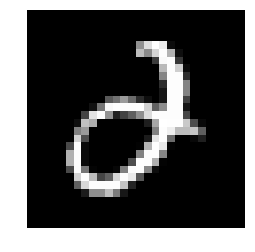

Numero 0 classificato come 4


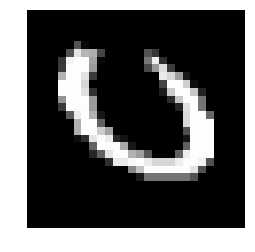

Numero 7 classificato come 1


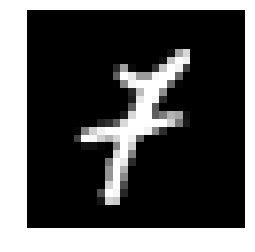

Numero 6 classificato come 2


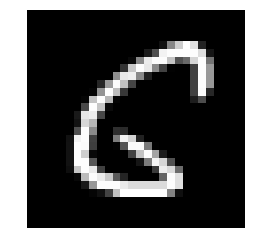

Numero 9 classificato come 4


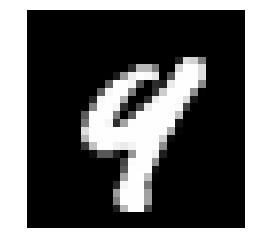

Numero 8 classificato come 3


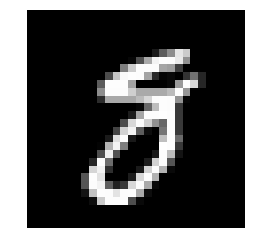

Numero 5 classificato come 6


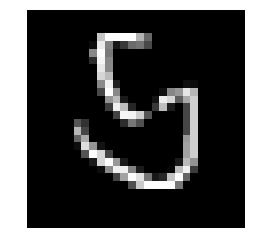

Numero 1 classificato come 3


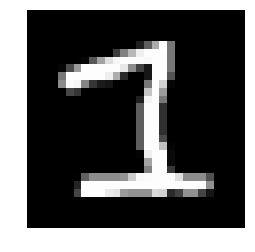

Numero 9 classificato come 3


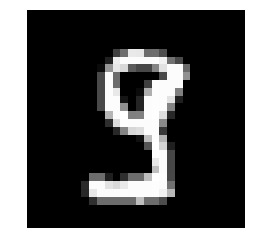

Numero 4 classificato come 2


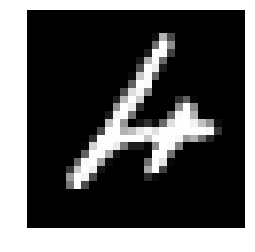

Numero 5 classificato come 3


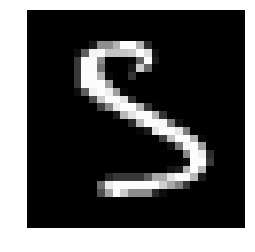

Numero 0 classificato come 2


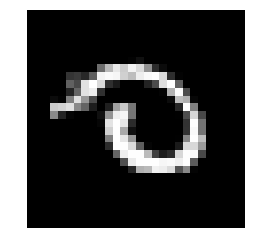

Numero 8 classificato come 3


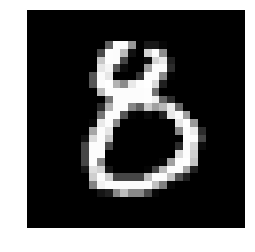

Numero 9 classificato come 3


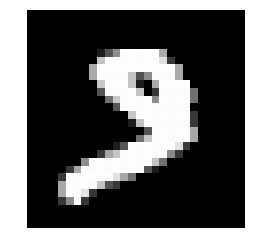

Numero 8 classificato come 2


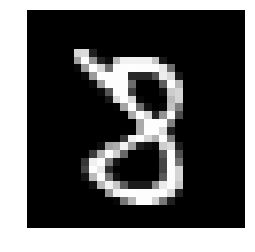

Numero 9 classificato come 0


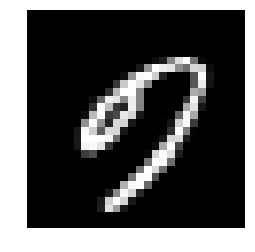

Numero 2 classificato come 7


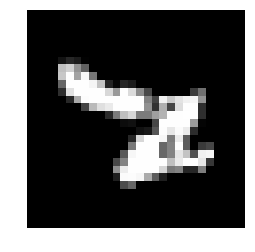

Numero 7 classificato come 9


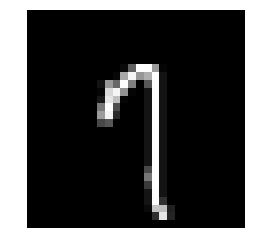

Numero 2 classificato come 8


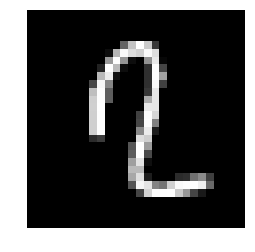

Numero 5 classificato come 3


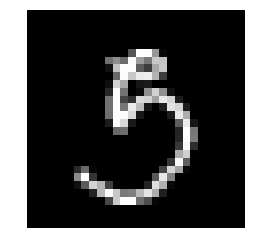

Numero 2 classificato come 8


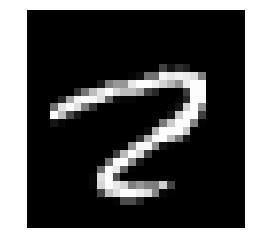

Numero 9 classificato come 4


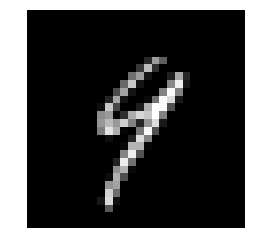

Numero 3 classificato come 2


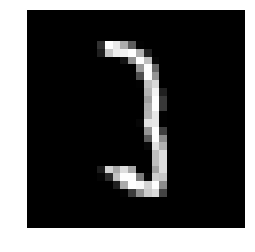

Numero 8 classificato come 7


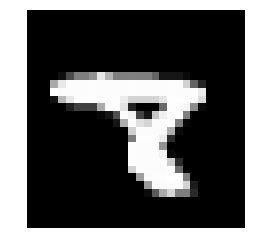

Numero 9 classificato come 8


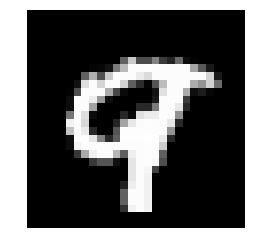

Numero 6 classificato come 5


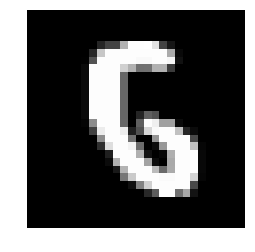

Numero 7 classificato come 9


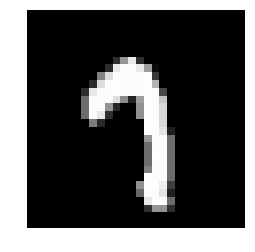

Numero 8 classificato come 4


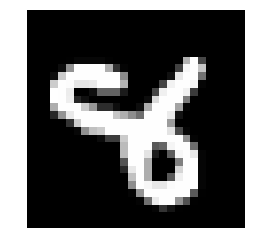

Numero 8 classificato come 9


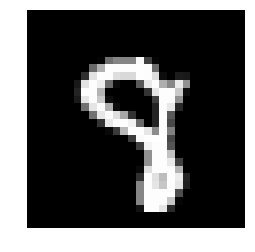

Numero 8 classificato come 3


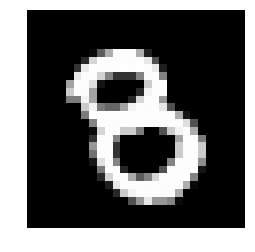

Numero 8 classificato come 7


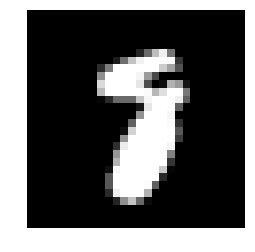

Numero 8 classificato come 3


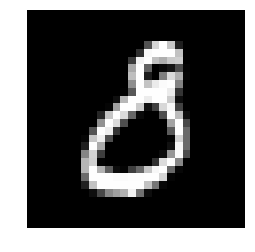

Numero 6 classificato come 4


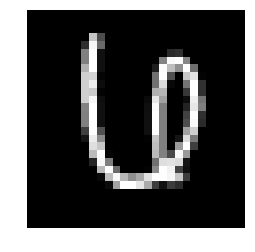

Numero 9 classificato come 4


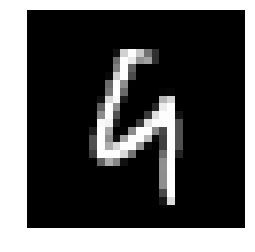

Numero 8 classificato come 6


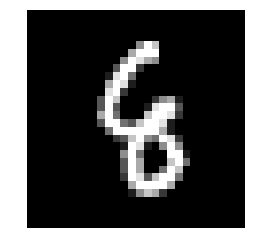

Numero 0 classificato come 8


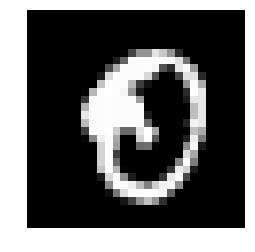

Numero 2 classificato come 8


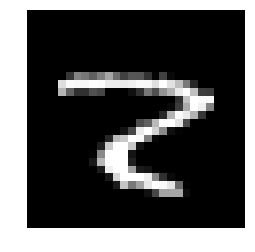

Numero 8 classificato come 4


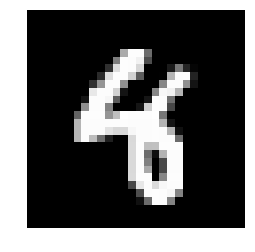

Numero 7 classificato come 3


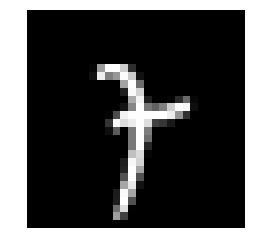

Numero 8 classificato come 3


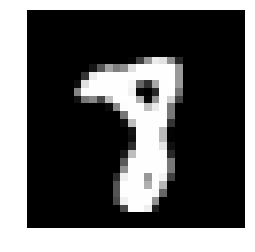

Numero 1 classificato come 6


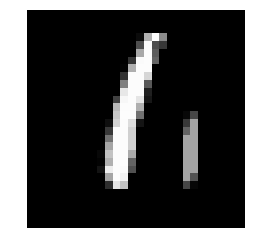

Numero 1 classificato come 8


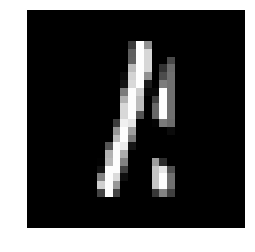

Numero 8 classificato come 3


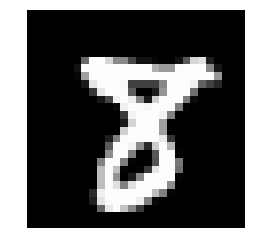

Numero 8 classificato come 0


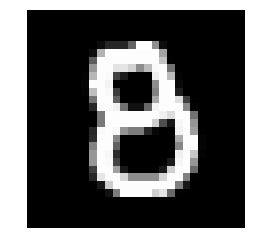

Numero 1 classificato come 5


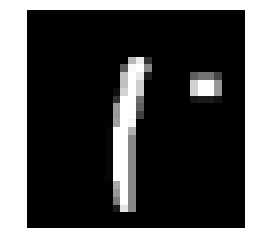

Numero 4 classificato come 3


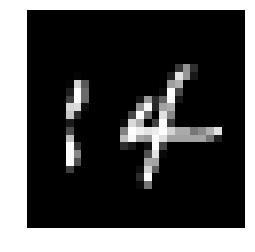

Numero 3 classificato come 2


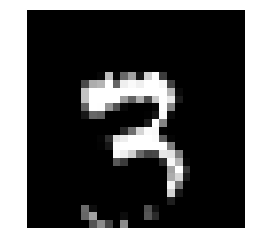

Numero 7 classificato come 0


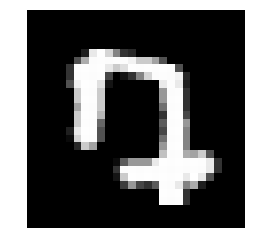

Numero 4 classificato come 9


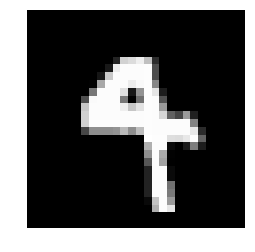

Numero 5 classificato come 3


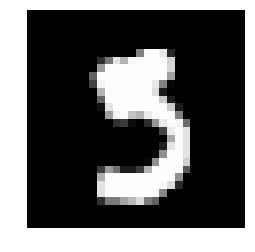

Numero 3 classificato come 8


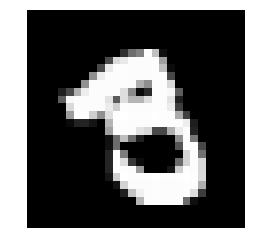

Numero 5 classificato come 3


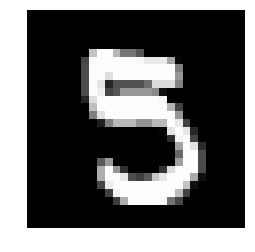

Numero 3 classificato come 8


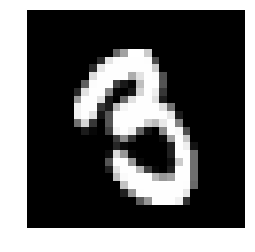

Numero 5 classificato come 3


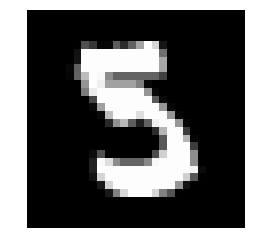

Numero 8 classificato come 3


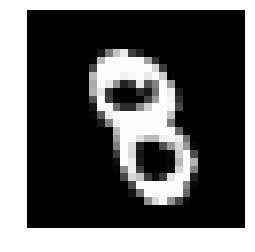

Numero 3 classificato come 9


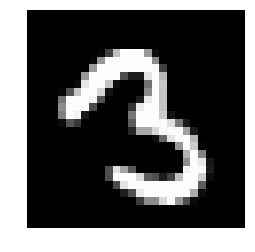

Numero 3 classificato come 9


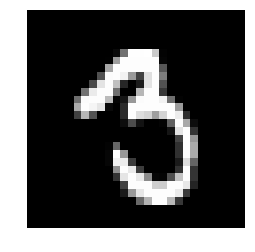

Numero 9 classificato come 3


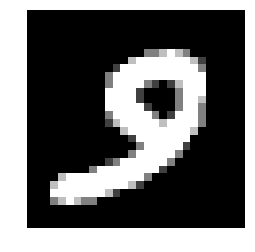

Numero 8 classificato come 2


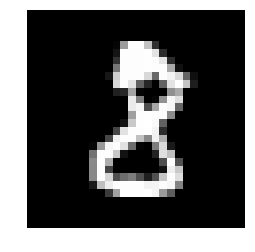

Numero 9 classificato come 0


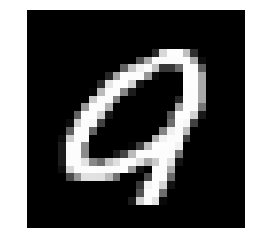

Numero 8 classificato come 9


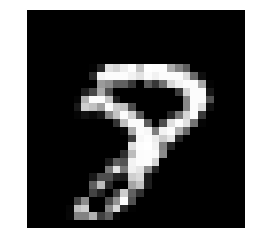

Numero 9 classificato come 5


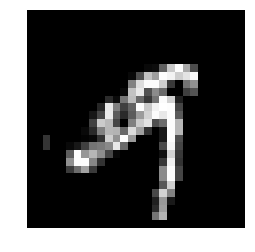

Numero 9 classificato come 7


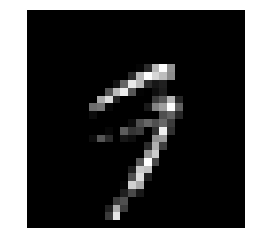

Numero 0 classificato come 7


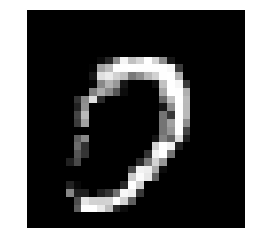

Numero 8 classificato come 2


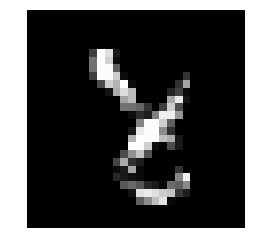

Numero 0 classificato come 5


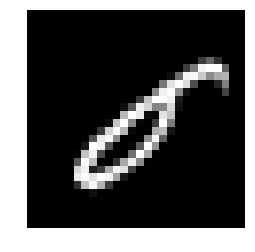

Numero 8 classificato come 9


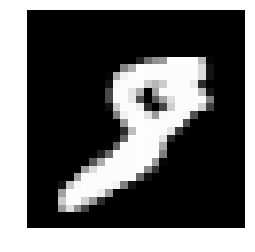

Numero 1 classificato come 6


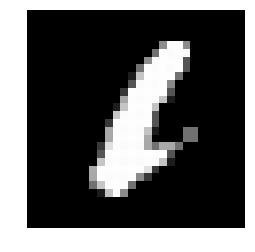

Numero 6 classificato come 4


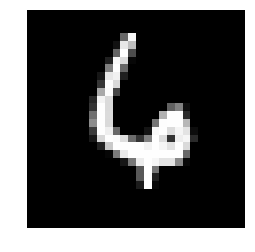

Numero 8 classificato come 3


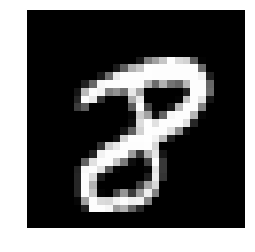

Numero 8 classificato come 0


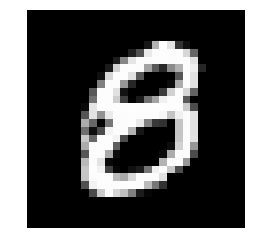

Numero 8 classificato come 3


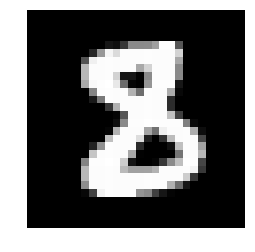

Numero 8 classificato come 3


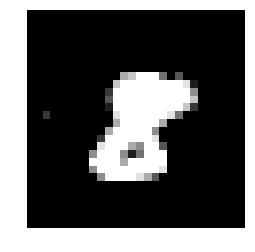

Numero 1 classificato come 8


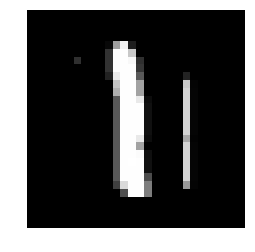

Numero 5 classificato come 8


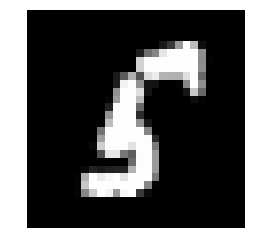

Numero 2 classificato come 8


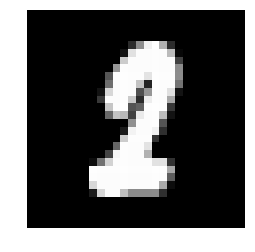

Numero 8 classificato come 5


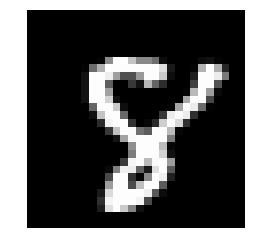

Numero 6 classificato come 4


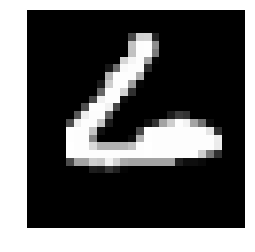

Numero 0 classificato come 6


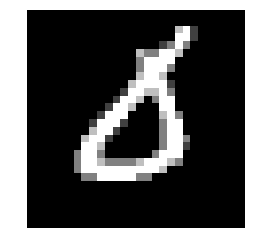

Numero 8 classificato come 6


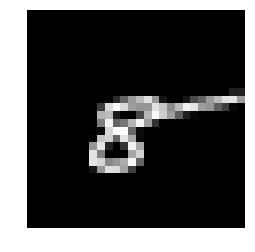

Numero 8 classificato come 0


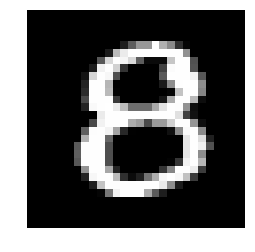

Numero 8 classificato come 6


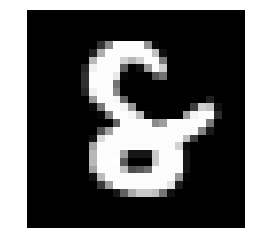

Numero 4 classificato come 9


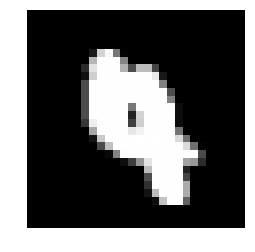

Numero 7 classificato come 2


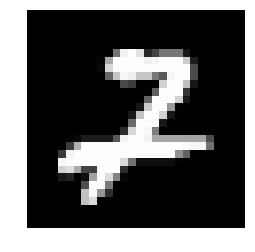

Numero 7 classificato come 2


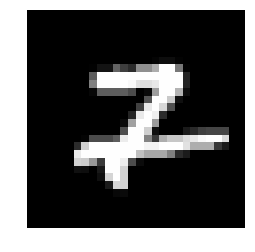

Numero 7 classificato come 2


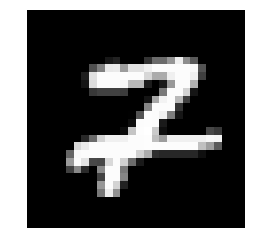

Numero 7 classificato come 2


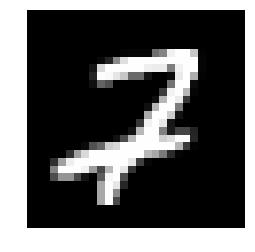

Numero 8 classificato come 5


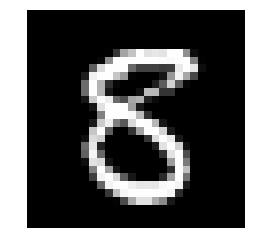

Numero 8 classificato come 5


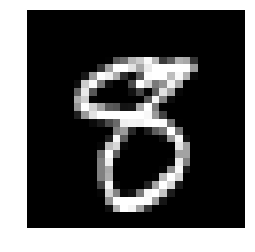

Numero 9 classificato come 4


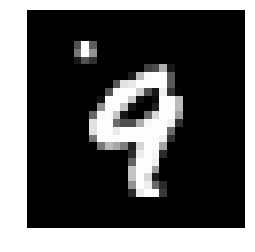

Numero 0 classificato come 1


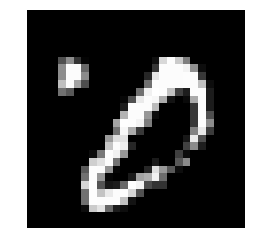

Numero 2 classificato come 7


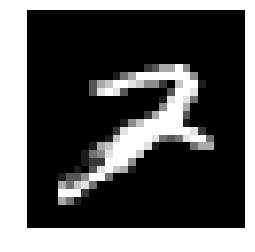

Numero 4 classificato come 7


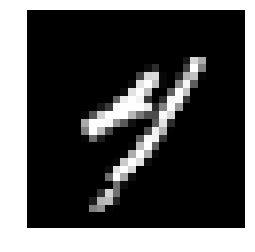

Numero 6 classificato come 3


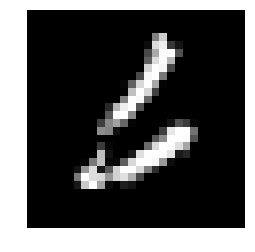

Numero 5 classificato come 6


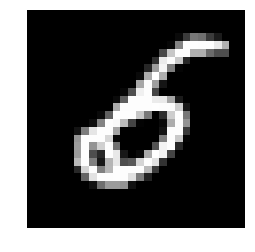

Numero 4 classificato come 0


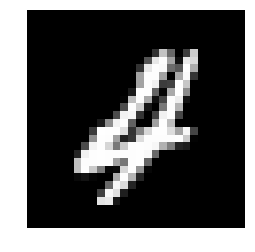

Numero 5 classificato come 6


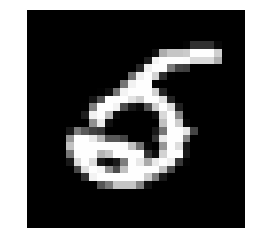

Numero 2 classificato come 0


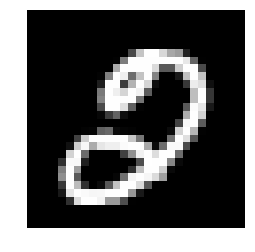

Numero 5 classificato come 0


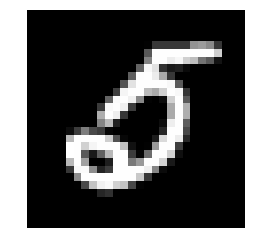

Numero 5 classificato come 0


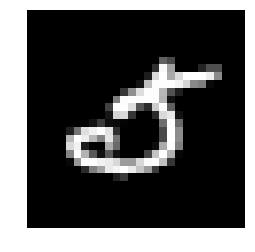

Numero 2 classificato come 3


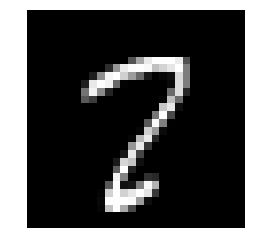

Numero 6 classificato come 0


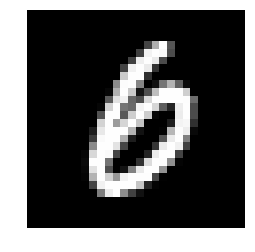

In [12]:
y_pred = model.predict_classes(X_test)

for i in range(0,len(X_test)):
    if(y_test[i]!=y_pred[i]):
        print("Numero %d classificato come %d" % (y_test[i], y_pred[i]))
        plt.imshow(X_test[i].reshape([28,28]), cmap="gray")
        plt.axis('off')
        plt.show()

Molte di queste immagini sono difficilmente distinguibili anche da un occhio umano, ma sicuramente con qualche accortezza in più il nostro modello può fare di meglio.